In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("0.Final_Forge.csv", low_memory=False)

# 데이터 정제 과정

print("="*50)
print("First Two Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Two Rows  

         Date     Time  Forge1  Forge2     SMP  system_demand
0  2019-03-01  0:00:00    86.4  107.52  113.17        65213.4
1  2019-03-01  0:01:00    86.4  111.36  113.17        65213.4 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308160 entries, 0 to 308159
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           308160 non-null  object 
 1   Time           308160 non-null  object 
 2   Forge1         306656 non-null  float64
 3   Forge2         308029 non-null  float64
 4   SMP            308160 non-null  float64
 5   system_demand  308160 non-null  float64
dtypes: float64(4), object(2)
memory usage: 14.1+ MB
None 

Describe the Dataset  

              Forge1         Forge2            SMP  system_demand
count  306656.000000  308029.000000  308160.000000  308160.000000
mean       56.902904      54.252197      86.418123   62721.518729
std        47.

In [4]:
#데이터에서 Year, Month, Day 추출/ 분, 시 추출
df['Date'] = pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Week'] = df['Date'].dt.dayofweek
df['Time']=pd.to_datetime(df['Time'],format='%H:%M:%S').dt.time
df['Hour']=df['Time'].apply(lambda x: x.hour)
print(df.head())
"""
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
"""

        Date      Time  Forge1  Forge2     SMP  system_demand  Year  Month  \
0 2019-03-01  00:00:00   86.40  107.52  113.17        65213.4  2019      3   
1 2019-03-01  00:01:00   86.40  111.36  113.17        65213.4  2019      3   
2 2019-03-01  00:02:00   88.32  111.36  113.17        65213.4  2019      3   
3 2019-03-01  00:03:00   88.32  107.52  113.17        65213.4  2019      3   
4 2019-03-01  00:04:00   86.40  109.44  113.17        65213.4  2019      3   

   Day  Week  Hour  
0    1     4     0  
1    1     4     0  
2    1     4     0  
3    1     4     0  
4    1     4     0  


"\ndf['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time\ndf['Hour'] = df['Time'].apply(lambda x: x.hour)\ndf['Week'] = df['Date'].dt.dayofweek\ndf['Month'] = df['Date'].dt.month\ndf['Year'] = df['Date'].dt.year\n"

In [5]:
from tqdm.auto import tqdm
import pandas as pd

# 요일별 평균
weekly_avg = pd.pivot_table(df, values=['Forge1', 'Forge2'], index=['Week'], aggfunc=np.mean).reset_index()
tqdm.pandas()
df['Forge1_Week_avg'] = df.progress_apply(lambda x: weekly_avg.loc[weekly_avg['Week'] == x['Week'], 'Forge1'].values[0], axis=1)
df['Forge2_Week_avg'] = df.progress_apply(lambda x: weekly_avg.loc[weekly_avg['Week'] == x['Week'], 'Forge2'].values[0], axis=1)

weekly_std = pd.pivot_table(df, values=['Forge1', 'Forge2'], index=['Week'], aggfunc=np.std).reset_index()
df['Forge1_Week_std'] = df.progress_apply(lambda x: weekly_std.loc[weekly_std['Week'] == x['Week'], 'Forge1'].values[0], axis=1)
df['Forge2_Week_std'] = df.progress_apply(lambda x: weekly_std.loc[weekly_std['Week'] == x['Week'], 'Forge2'].values[0], axis=1)

  0%|          | 0/308160 [00:00<?, ?it/s]

  0%|          | 0/308160 [00:00<?, ?it/s]

  0%|          | 0/308160 [00:00<?, ?it/s]

  0%|          | 0/308160 [00:00<?, ?it/s]

In [6]:
df['hol'] = 0

df.loc[df['Week'] >= 5, 'hol'] = 1

# 법정 공휴일 설정
df.loc[(df['Month'] == 3) & (df['Day'] == 1), 'hol'] = 1   # 3.1절
df.loc[(df['Month'] == 6) & (df['Day'] == 6), 'hol'] = 1   # 현충일
df.loc[(df['Month'] == 8) & (df['Day'] == 15), 'hol'] = 1  # 광복절
df.loc[(df['Month'] == 9) & (df['Day'] == 12), 'hol'] = 1  # 추석 연휴
df.loc[(df['Month'] == 9) & (df['Day'] == 13), 'hol'] = 1  # 추석

df.head()

,Date,Time,Forge1,Forge2,SMP,system_demand,Year,Month,Day,Week,Hour,Forge1_Week_avg,Forge2_Week_avg,Forge1_Week_std,Forge2_Week_std,hol
0,2019-03-01,00:00:00,86.40,107.52,113.17,65213.4,2019,3,1,4,0,77.504903,70.647355,39.736314,25.686199,1
1,2019-03-01,00:01:00,86.40,111.36,113.17,65213.4,2019,3,1,4,0,77.504903,70.647355,39.736314,25.686199,1
2,2019-03-01,00:02:00,88.32,111.36,113.17,65213.4,2019,3,1,4,0,77.504903,70.647355,39.736314,25.686199,1
3,2019-03-01,00:03:00,88.32,107.52,113.17,65213.4,2019,3,1,4,0,77.504903,70.647355,39.736314,25.686199,1
4,2019-03-01,00:04:00,86.40,109.44,113.17,65213.4,2019,3,1,4,0,77.504903,70.647355,39.736314,25.686199,1


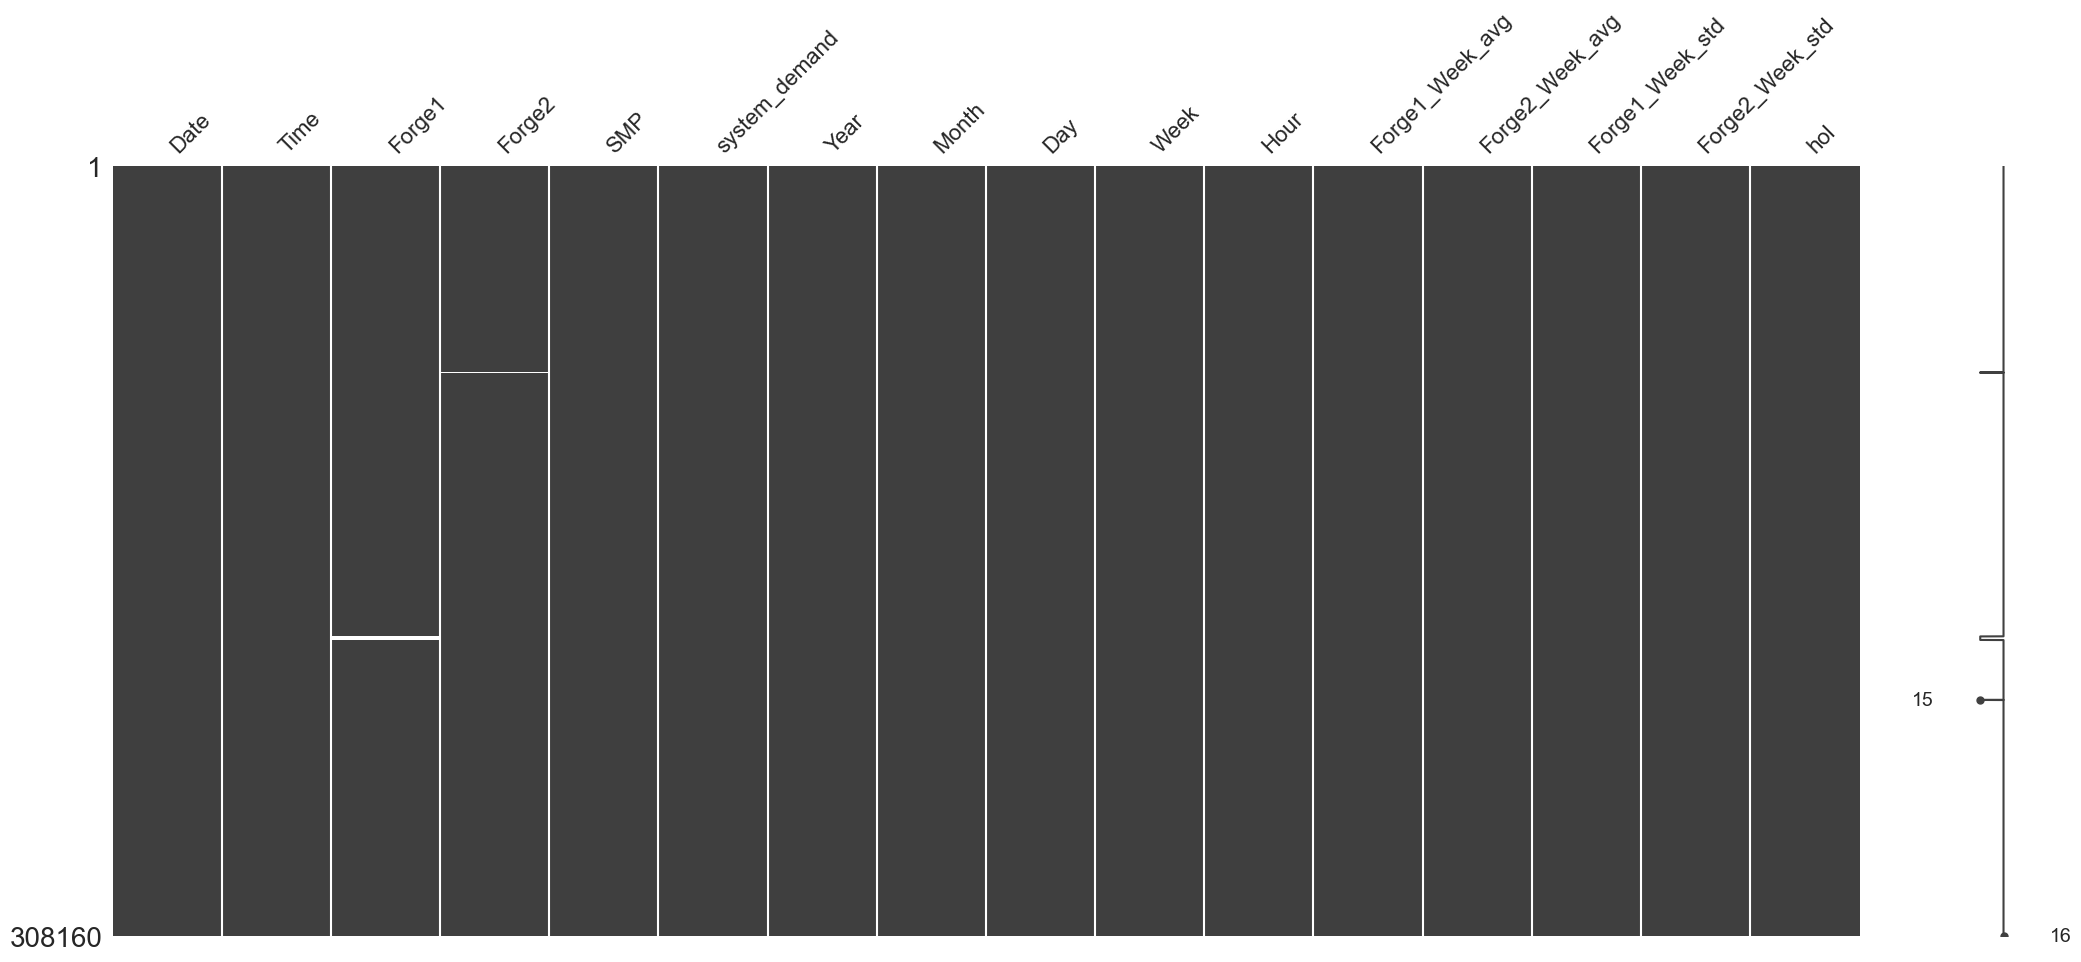

In [7]:
import missingno as msno

msno.matrix(df)
plt.show()

In [8]:
#forge1은 7월 9일, 10일, 27일 결측
df.loc[df['Forge1'].isna()]

,Date,Time,Forge1,Forge2,SMP,system_demand,Year,Month,Day,Week,Hour,Forge1_Week_avg,Forge2_Week_avg,Forge1_Week_std,Forge2_Week_std,hol
188270,2019-07-09,17:50:00,NaN,24.96,85.73,73203.7,2019,7,9,1,17,81.387110,72.150844,37.214532,25.618619,0
188271,2019-07-09,17:51:00,NaN,24.96,85.73,73203.7,2019,7,9,1,17,81.387110,72.150844,37.214532,25.618619,0
188272,2019-07-09,17:52:00,NaN,21.12,85.73,73203.7,2019,7,9,1,17,81.387110,72.150844,37.214532,25.618619,0
188273,2019-07-09,17:53:00,NaN,21.12,85.73,73203.7,2019,7,9,1,17,81.387110,72.150844,37.214532,25.618619,0
188274,2019-07-09,17:54:00,NaN,21.12,85.73,73203.7,2019,7,9,1,17,81.387110,72.150844,37.214532,25.618619,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213727,2019-07-27,10:07:00,NaN,71.04,79.73,69018.6,2019,7,27,5,10,33.946828,54.479488,41.629321,32.315326,1
213728,2019-07-27,10:08:00,NaN,71.04,79.73,69018.6,2019,7,27,5,10,33.946828,54.479488,41.629321,32.315326,1
213729,2019-07-27,10:09:00,NaN,72.96,79.73,69018.6,2019,7,27,5,10,33.946828,54.479488,41.629321,32.315326,1
213730,2019-07-27,10:10:00,NaN,71.04,79.73,69109.1,2019,7,27,5,10,33.946828,54.479488,41.629321,32.315326,1


In [9]:
#forge2는 4월 27일 하루만 결측
df.loc[df['Forge2'].isna()]

,Date,Time,Forge1,Forge2,SMP,system_demand,Year,Month,Day,Week,Hour,Forge1_Week_avg,Forge2_Week_avg,Forge1_Week_std,Forge2_Week_std,hol
82632,2019-04-27,09:12:00,1.92,NaN,99.88,53295.9,2019,4,27,5,9,33.946828,54.479488,41.629321,32.315326,1
82633,2019-04-27,09:13:00,3.84,NaN,99.88,53295.9,2019,4,27,5,9,33.946828,54.479488,41.629321,32.315326,1
82634,2019-04-27,09:14:00,1.92,NaN,99.88,53295.9,2019,4,27,5,9,33.946828,54.479488,41.629321,32.315326,1
82635,2019-04-27,09:15:00,1.92,NaN,99.88,53457.9,2019,4,27,5,9,33.946828,54.479488,41.629321,32.315326,1
82636,2019-04-27,09:16:00,1.92,NaN,99.88,53457.9,2019,4,27,5,9,33.946828,54.479488,41.629321,32.315326,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82780,2019-04-27,11:40:00,1.92,NaN,98.68,53240.9,2019,4,27,5,11,33.946828,54.479488,41.629321,32.315326,1
82781,2019-04-27,11:41:00,1.92,NaN,98.68,53240.9,2019,4,27,5,11,33.946828,54.479488,41.629321,32.315326,1
82782,2019-04-27,11:42:00,1.92,NaN,98.68,53240.9,2019,4,27,5,11,33.946828,54.479488,41.629321,32.315326,1
82783,2019-04-27,11:43:00,1.92,NaN,98.68,53240.9,2019,4,27,5,11,33.946828,54.479488,41.629321,32.315326,1


In [10]:
date_filter = df['Date'] == '2019-06-13'

In [11]:
time_start = pd.to_datetime('17:49:00').time()
time_end = pd.to_datetime('19:01:00').time()
time_filter = (df['Time'] >= time_start) & (df['Time'] <= time_end)

In [12]:
print(df.loc[date_filter & time_filter, ['Date', 'Time', 'Forge1']])

             Date      Time  Forge1
150829 2019-06-13  17:49:00   26.88
150830 2019-06-13  17:50:00   11.52
150831 2019-06-13  17:51:00   13.44
150832 2019-06-13  17:52:00    9.60
150833 2019-06-13  17:53:00   11.52
...           ...       ...     ...
150897 2019-06-13  18:57:00    3.84
150898 2019-06-13  18:58:00    1.92
150899 2019-06-13  18:59:00    3.84
150900 2019-06-13  19:00:00    5.76
150901 2019-06-13  19:01:00   15.36

[73 rows x 3 columns]


In [13]:
df.loc[date_filter & time_filter, 'Forge1'] = np.nan

In [14]:
print(df.loc[date_filter & time_filter, ['Date', 'Time', 'Forge1']])

             Date      Time  Forge1
150829 2019-06-13  17:49:00     NaN
150830 2019-06-13  17:50:00     NaN
150831 2019-06-13  17:51:00     NaN
150832 2019-06-13  17:52:00     NaN
150833 2019-06-13  17:53:00     NaN
...           ...       ...     ...
150897 2019-06-13  18:57:00     NaN
150898 2019-06-13  18:58:00     NaN
150899 2019-06-13  18:59:00     NaN
150900 2019-06-13  19:00:00     NaN
150901 2019-06-13  19:01:00     NaN

[73 rows x 3 columns]


In [15]:
import numpy as np
import pandas as pd
from empca import em_pca

In [16]:
# 결측치가 있는 데이터만 선택 (수치형 데이터)
numeric_data = df.select_dtypes(include=[np.number])
weights = np.ones_like(numeric_data, dtype=float)
missing_mask = numeric_data.isnull()

In [17]:
# 결측치에 대한 가중치를 0으로 설정
weights[missing_mask] = 0

numeric_data_filled = numeric_data.fillna(0)

In [18]:
model = em_pca.em_pca(numeric_data_filled.values, weights=weights, niter=10, nvec=2)

       iter        R2             rchi2
em_pca  1/10       0.31654733 218601237.87943888
em_pca  2/10       0.99999886    352.48416608
em_pca  3/10       0.99999886    352.39073459
em_pca  4/10       0.99999886    352.39072465
em_pca  5/10       0.99999886    352.39072464
em_pca  6/10       0.99999886    352.39072464
em_pca  7/10       0.99999886    352.39072464
em_pca  8/10       0.99999886    352.39072464
em_pca  9/10       0.99999886    352.39072464
em_pca 10/10       0.99999886    352.39072464
R2: 0.9999988571878954


In [19]:
for column in numeric_data.columns:
    missing_indices = missing_mask[column][missing_mask[column]].index
    col_idx = numeric_data.columns.get_loc(column)
    numeric_data.loc[missing_indices, column] = model.model[missing_indices, col_idx]

In [20]:
# 원래 DataFrame에 결과를 업데이트
df.loc[:, numeric_data.columns] = numeric_data

print("Updated DataFrame with EMPCA:")
print(df.head())

Updated DataFrame with EMPCA:
        Date      Time  Forge1  Forge2     SMP  system_demand  Year  Month  \
0 2019-03-01  00:00:00   86.40  107.52  113.17        65213.4  2019      3   
1 2019-03-01  00:01:00   86.40  111.36  113.17        65213.4  2019      3   
2 2019-03-01  00:02:00   88.32  111.36  113.17        65213.4  2019      3   
3 2019-03-01  00:03:00   88.32  107.52  113.17        65213.4  2019      3   
4 2019-03-01  00:04:00   86.40  109.44  113.17        65213.4  2019      3   

   Day  Week  Hour  Forge1_Week_avg  Forge2_Week_avg  Forge1_Week_std  \
0    1     4     0        77.504903        70.647355        39.736314   
1    1     4     0        77.504903        70.647355        39.736314   
2    1     4     0        77.504903        70.647355        39.736314   
3    1     4     0        77.504903        70.647355        39.736314   
4    1     4     0        77.504903        70.647355        39.736314   

   Forge2_Week_std  hol  
0        25.686199    1  
1        2

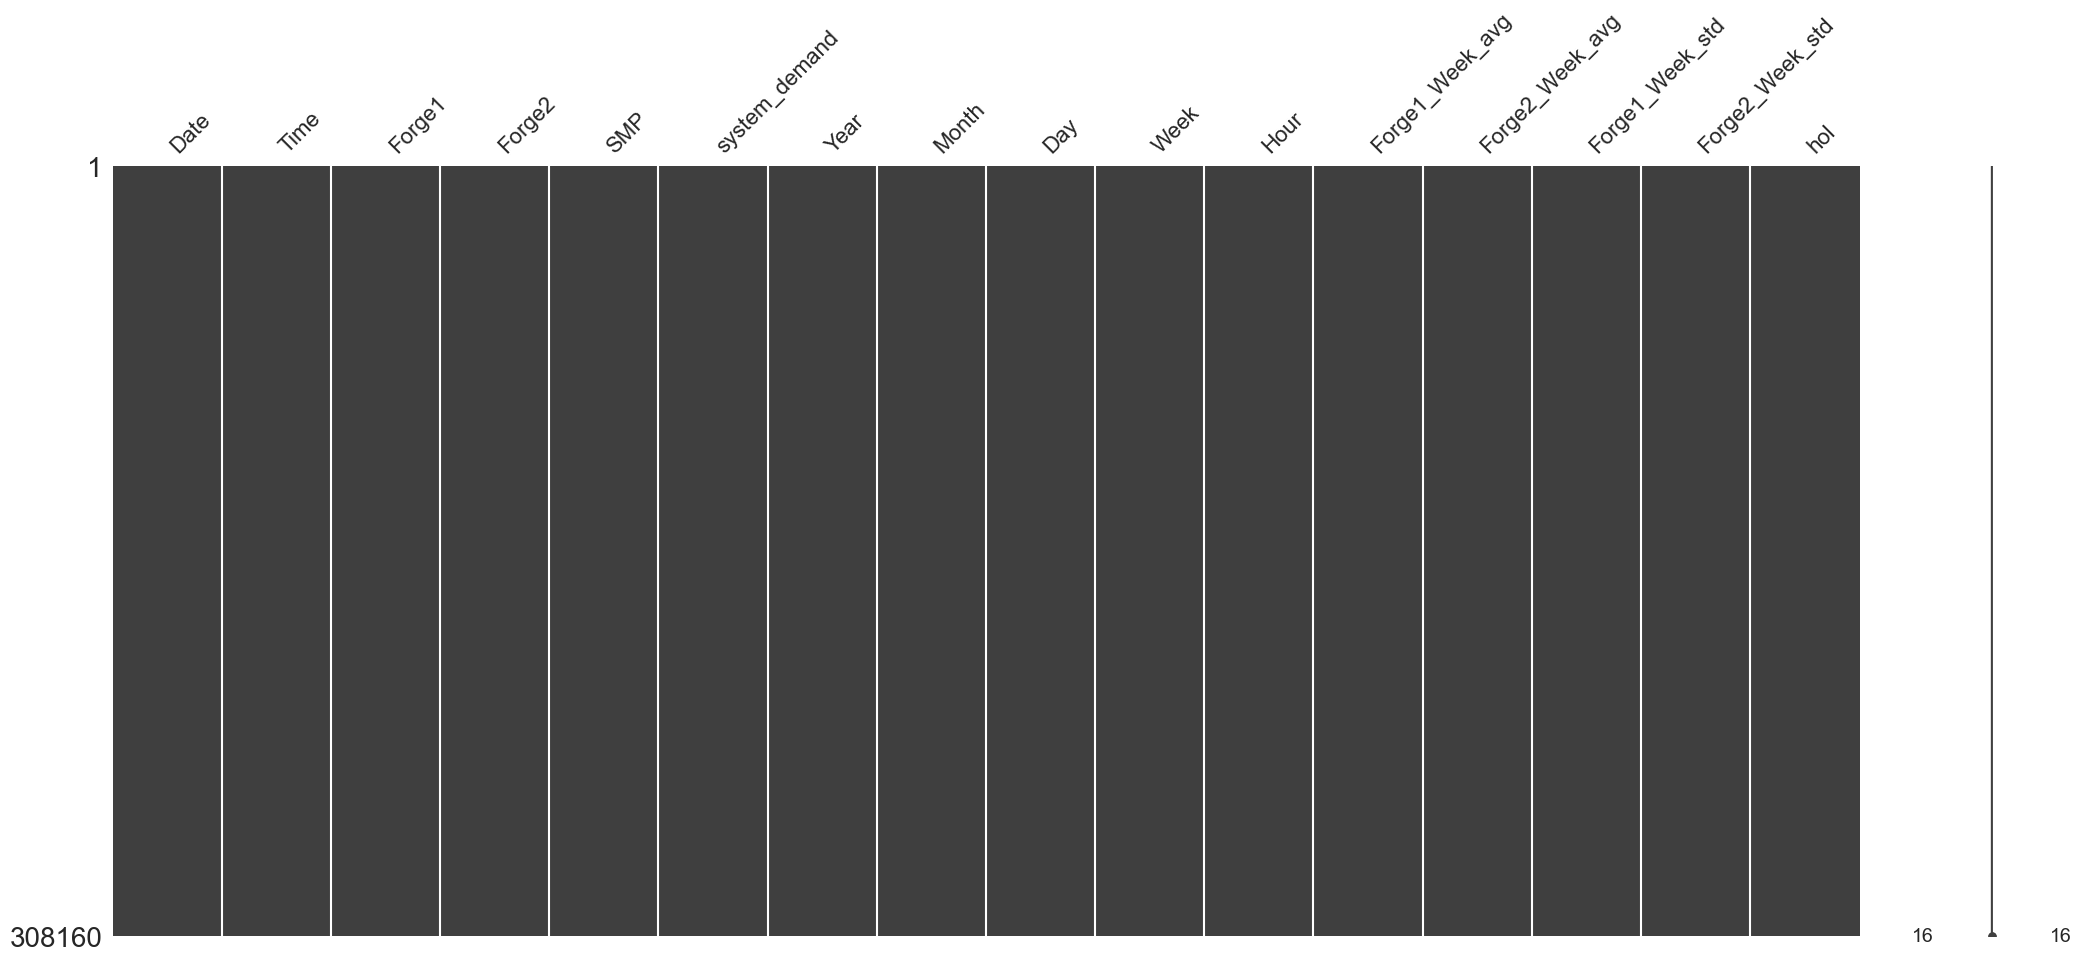

In [21]:
msno.matrix(df)
plt.show()

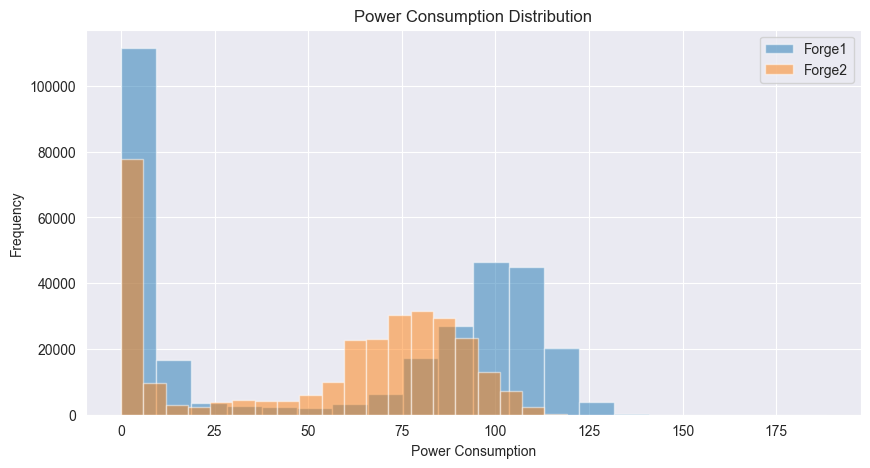

In [22]:
import matplotlib.pyplot as plt

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
plt.hist(df['Forge1'], bins=20, alpha=0.5, label='Forge1')
plt.hist(df['Forge2'], bins=20, alpha=0.5, label='Forge2')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')
plt.title('Power Consumption Distribution')
plt.legend()
plt.show()

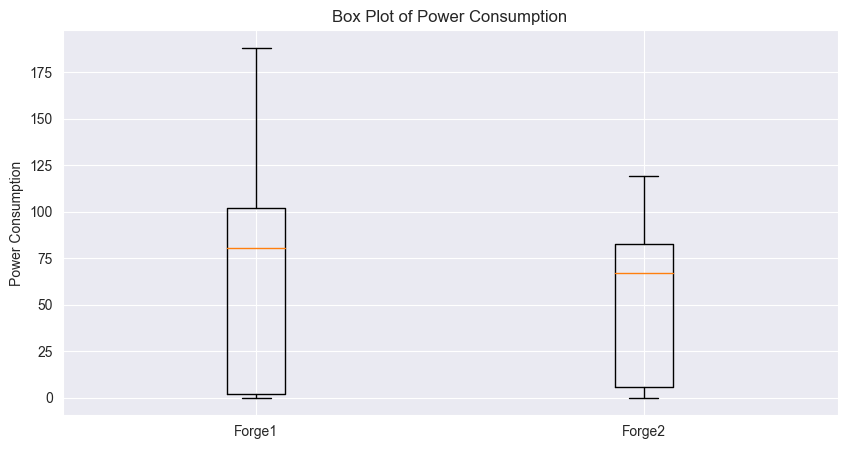

In [23]:
plt.figure(figsize=(10, 5))
plt.boxplot([df['Forge1'], df['Forge2']], labels=['Forge1', 'Forge2'])
plt.title('Box Plot of Power Consumption')
plt.ylabel('Power Consumption')
plt.show()

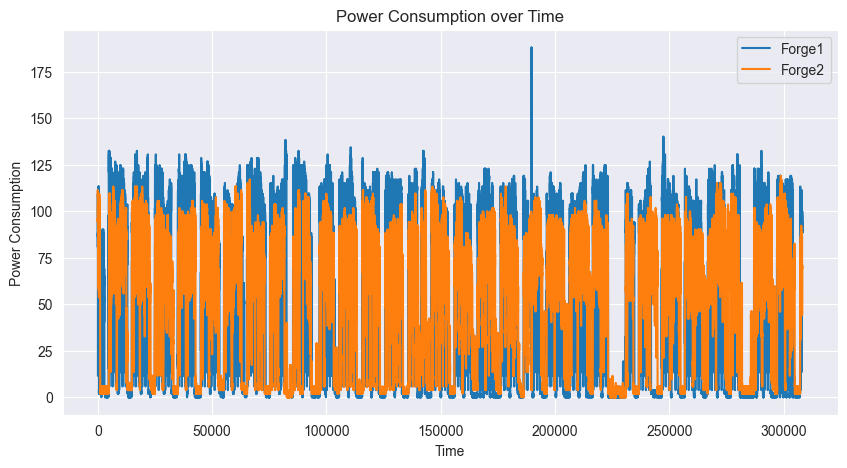

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Forge1'], label='Forge1')
plt.plot(df.index, df['Forge2'], label='Forge2')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Power Consumption over Time')
plt.legend()
plt.show()

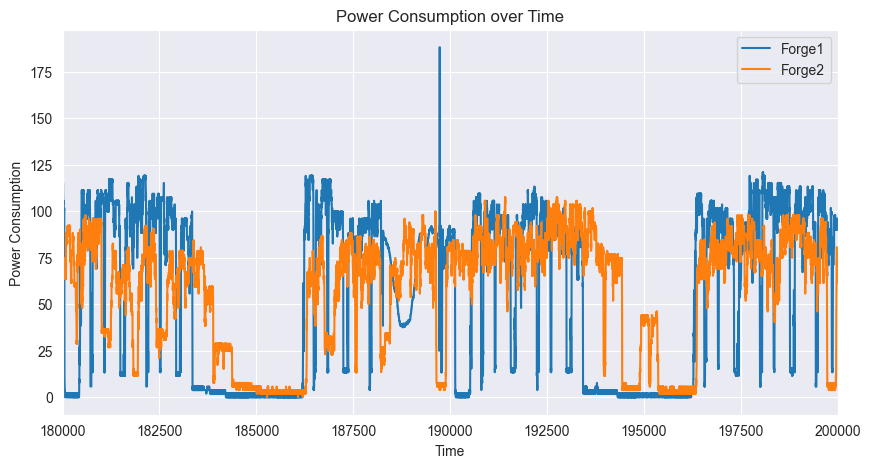

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Forge1'], label='Forge1')
plt.plot(df.index, df['Forge2'], label='Forge2')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Power Consumption over Time')
plt.legend()

plt.xlim(180000, 200000) 
plt.show()

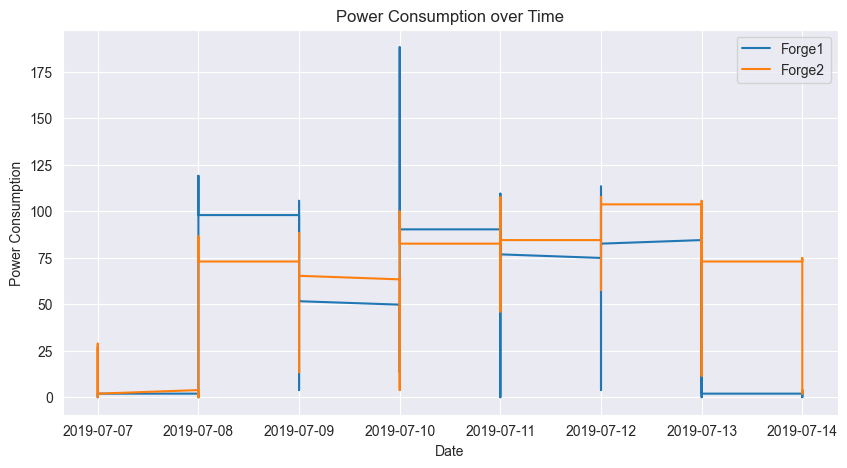

In [26]:
df_copy = df.copy()  # df의 복사본 생성

df_copy['Date'] = pd.to_datetime(df_copy['Date'])
df_copy.set_index('Date', inplace=True)

filtered_data = df_copy.loc[df_copy.index[185000]:df_copy.index[195000]]
if not filtered_data.empty:
    plt.figure(figsize=(10, 5))
    plt.plot(filtered_data.index, filtered_data['Forge1'], label='Forge1')
    plt.plot(filtered_data.index, filtered_data['Forge2'], label='Forge2')
    plt.xlabel('Date')  # x축 레이블 수정
    plt.ylabel('Power Consumption')
    plt.title('Power Consumption over Time')
    plt.legend()
    plt.show()
else:
    print("No data found in the specified index range.")

In [27]:
specific_date = pd.Timestamp('2019-07-10')

# 특정 날짜에 해당하는 데이터 필터링
filtered_data = df[df['Date'] == specific_date]

# 'Forge1' 데이터 출력
filtered_data[['Date', 'Forge1']]

,Date,Forge1
188640,2019-07-10,49.769341
188641,2019-07-10,49.769341
188642,2019-07-10,49.769341
188643,2019-07-10,49.766371
188644,2019-07-10,49.766371
...,...,...
190075,2019-07-10,88.320000
190076,2019-07-10,90.240000
190077,2019-07-10,88.320000
190078,2019-07-10,90.240000


In [28]:
df.loc[189734, 'Forge1'] = np.nan

In [29]:
median_value = df['Forge1'].median()

# 해당 인덱스의 Forge1 값을 중앙값으로 대체
df.loc[189734, 'Forge1'] = median_value

In [30]:
# 인덱스 189734의 'Forge1' 값을 출력
print("Updated value at index 189734 for 'Forge1':", df.loc[189734, 'Forge1'])

Updated value at index 189734 for 'Forge1': 80.64


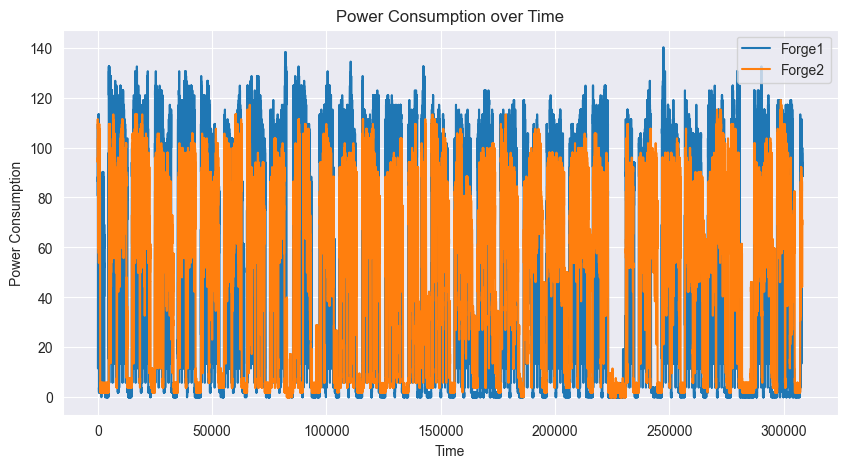

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Forge1'], label='Forge1')
plt.plot(df.index, df['Forge2'], label='Forge2')
plt.xlabel('Time')
plt.ylabel('Power Consumption')
plt.title('Power Consumption over Time')
plt.legend()
plt.show()

In [32]:
df_new=df.drop(labels=['Date','Time'],axis=1)
print(df_new.tail())
print(df_new.info())

        Forge1  Forge2    SMP  system_demand  Year  Month  Day  Week  Hour  \
308155   99.84   71.04  82.46        58928.4  2019      9   30     0    23   
308156   99.84   69.12  82.46        58928.4  2019      9   30     0    23   
308157   97.92   69.12  82.46        58928.4  2019      9   30     0    23   
308158   99.84   69.12  82.46        58928.4  2019      9   30     0    23   
308159   99.84   69.12  82.46        58928.4  2019      9   30     0    23   

        Forge1_Week_avg  Forge2_Week_avg  Forge1_Week_std  Forge2_Week_std  \
308155        59.970925        43.722366        48.672835        38.156738   
308156        59.970925        43.722366        48.672835        38.156738   
308157        59.970925        43.722366        48.672835        38.156738   
308158        59.970925        43.722366        48.672835        38.156738   
308159        59.970925        43.722366        48.672835        38.156738   

        hol  
308155    0  
308156    0  
308157    0  
308158

In [33]:
grouped_day = df_new.groupby(['Month', 'Day'])
mean_day = grouped_day.mean()
mean_day.reset_index(level=['Month','Day'],inplace=True)
print(mean_day.head(10))

   Month  Day     Forge1     Forge2         SMP  system_demand    Year  Week  \
0      3    1  27.649333  63.980000  112.123333   61072.441319  2019.0   4.0   
1      3    2  46.133333   3.940000  106.874583   58550.489931  2019.0   5.0   
2      3    3   1.976000   3.953333  106.881667   55906.066319  2019.0   6.0   
3      3    4  74.942667  53.378667  112.939167   64461.219097  2019.0   0.0   
4      3    5  93.845333  81.648000  113.492500   67352.024653  2019.0   1.0   
5      3    6  88.302667  63.866667  113.370833   66996.260069  2019.0   2.0   
6      3    7  72.572000  72.500000  113.099583   66894.365278  2019.0   3.0   
7      3    8  93.132000  89.606667  113.303333   66188.389236  2019.0   4.0   
8      3    9  74.610667  70.529333  110.785000   59797.574653  2019.0   5.0   
9      3   10   1.926667   5.756000  108.325000   56559.726736  2019.0   6.0   

   Hour  Forge1_Week_avg  Forge2_Week_avg  Forge1_Week_std  Forge2_Week_std  \
0  11.5        77.504903        70.64735

array([<Axes: xlabel='Day'>, <Axes: xlabel='Day'>, <Axes: xlabel='Day'>,
       <Axes: xlabel='Day'>, <Axes: xlabel='Day'>, <Axes: xlabel='Day'>,
       <Axes: xlabel='Day'>], dtype=object)

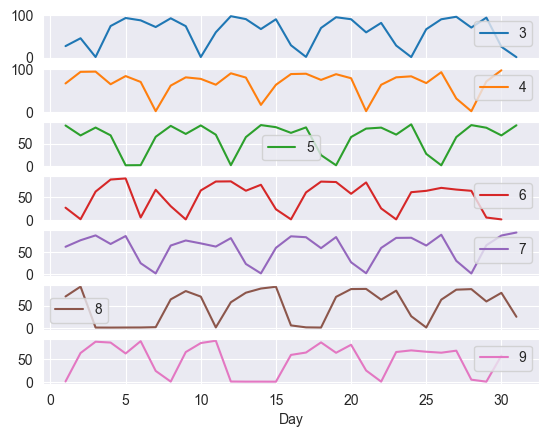

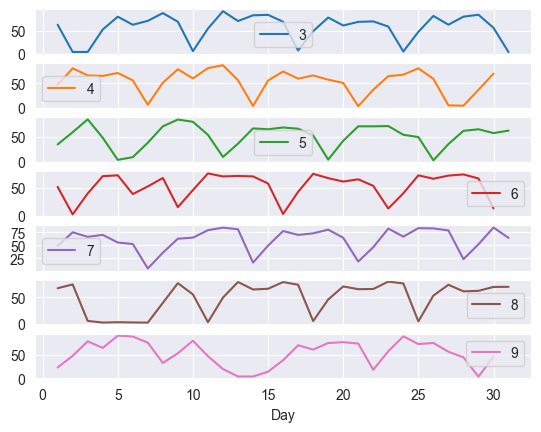

In [34]:
pd.pivot_table(mean_day,
               index='Day', columns='Month', values='Forge1'
              ).plot(subplots=True)
pd.pivot_table(mean_day,
               index='Day', columns='Month', values='Forge2'
              ).plot(subplots=True)

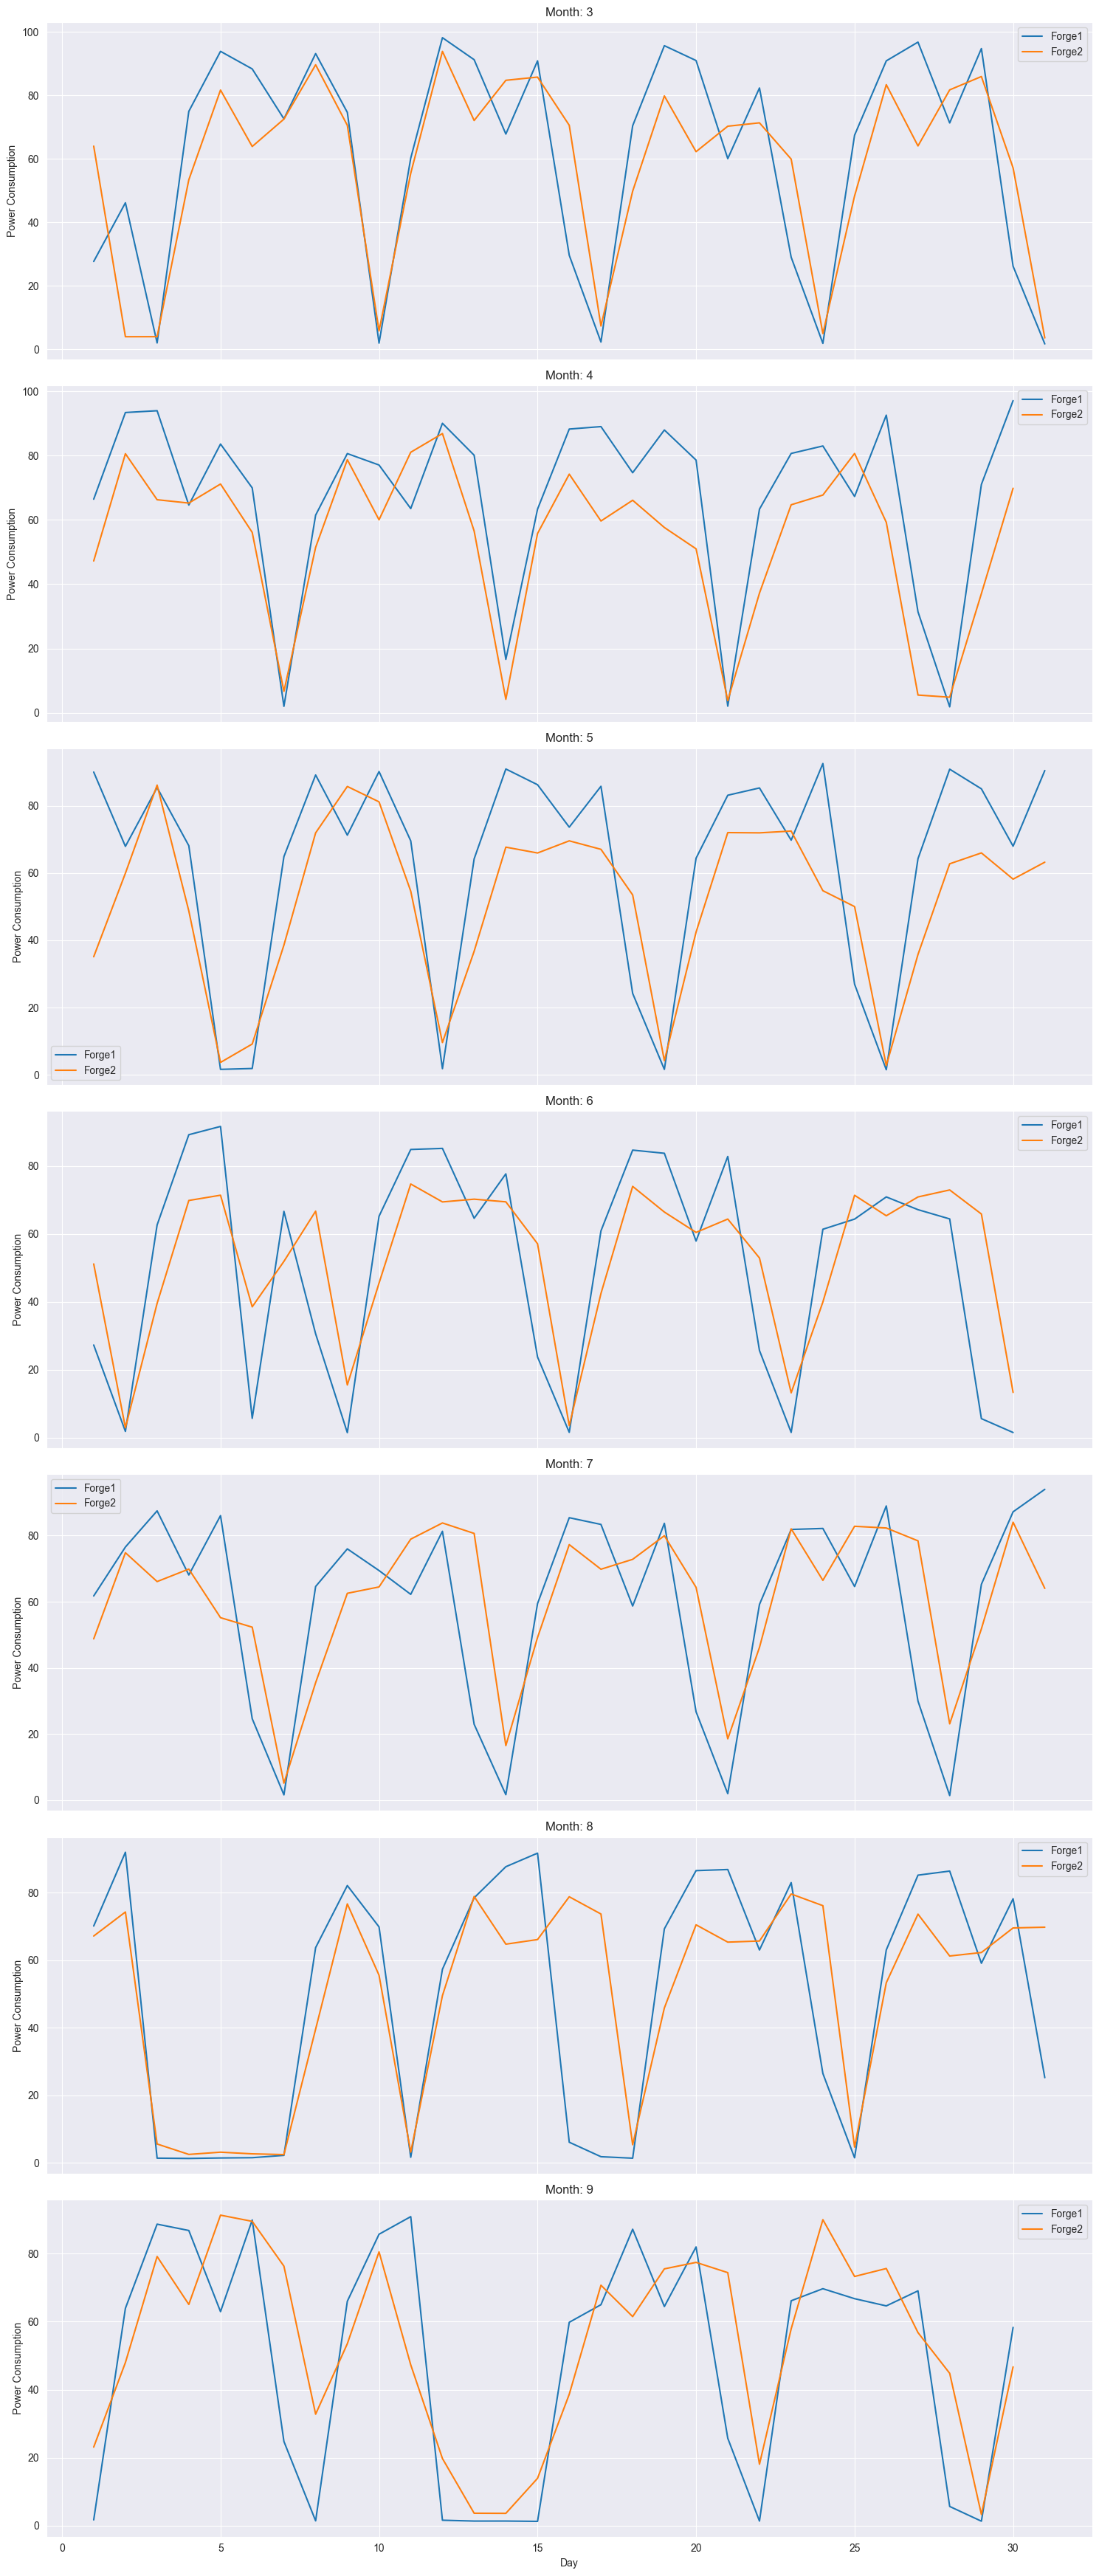

In [35]:
#일별 forge값 merge
# 기존 피벗 테이블 생성 코드
pivot_table = pd.pivot_table(mean_day,
                             index='Day',
                             columns='Month',
                             values=['Forge1', 'Forge2'])

# 월별 subplot 생성
months = pivot_table.columns.levels[1]  # 피벗 테이블의 월 리스트 가져오기
num_months = len(months)  # 월 개수

fig, axes = plt.subplots(num_months, 1, figsize=(15, 5 * num_months), sharex=True)

for i, month in enumerate(months):
    ax = axes[i]
    pivot_table.xs(month, level='Month', axis=1).plot(ax=ax)
    ax.set_title(f'Month: {month}')
    ax.set_ylabel('Power Consumption')
    ax.set_xlabel('Day')
    ax.legend(['Forge1', 'Forge2'])

plt.tight_layout()
plt.show()

                    Month       Day    Forge1    Forge2       SMP  \
Month            1.000000 -0.004028 -0.168084 -0.036804 -0.739175   
Day             -0.004028  1.000000  0.014704  0.077207  0.008083   
Forge1          -0.168084  0.014704  1.000000  0.760612  0.280199   
Forge2          -0.036804  0.077207  0.760612  1.000000  0.220978   
SMP             -0.739175  0.008083  0.280199  0.220978  1.000000   
system_demand    0.230674  0.005803  0.575606  0.580297  0.160805   
Week            -0.009297  0.034963 -0.598189 -0.363987 -0.114188   
Forge1_Week_avg -0.002606 -0.016808  0.841239  0.713096  0.174496   
Forge2_Week_avg -0.006488 -0.006553  0.741059  0.810507  0.177205   
Forge1_Week_std  0.003840 -0.020581  0.577326  0.621661  0.146081   
Forge2_Week_std  0.007048 -0.024044  0.416083  0.342157  0.096874   
hol              0.021743 -0.012455 -0.791639 -0.577793 -0.158922   

                 system_demand      Week  Forge1_Week_avg  Forge2_Week_avg  \
Month                 0.

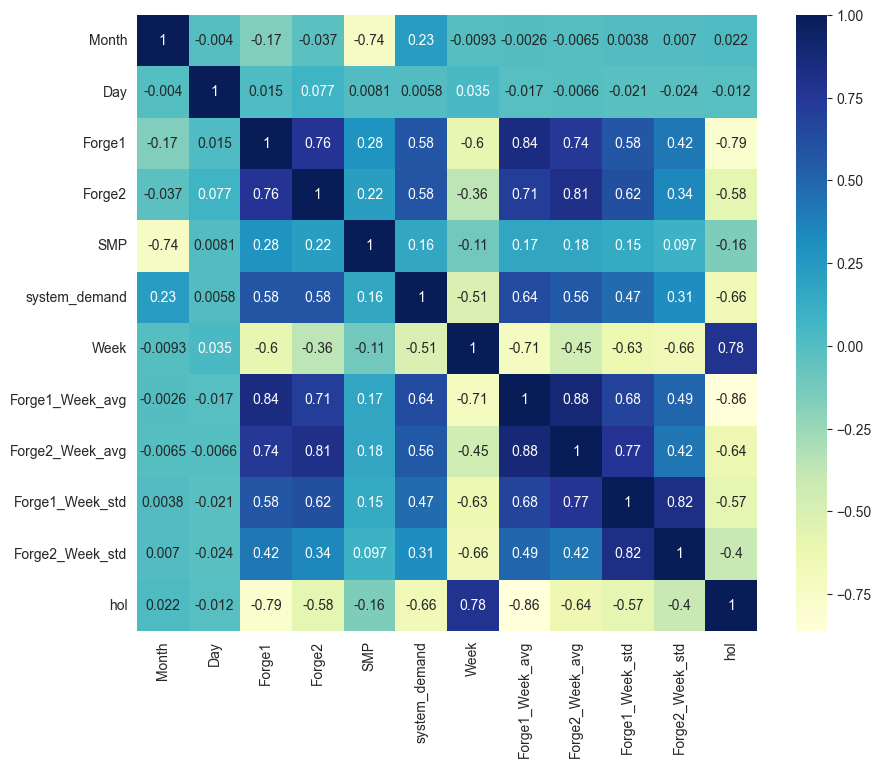

In [36]:
# 변수별 상관관계 맵
mean_day=mean_day.drop(labels=["Year", "Hour"], axis=1)
corr_res=mean_day.corr()
print(corr_res)
plt.figure(figsize=(10,8))
sns.heatmap(corr_res,annot=True, cmap='YlGnBu')
plt.show()